# ML task from coursera

## Read data

In [2]:
import pandas as pd

data = pd.read_csv('CCPP_data.csv')

print(data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


## Plot data

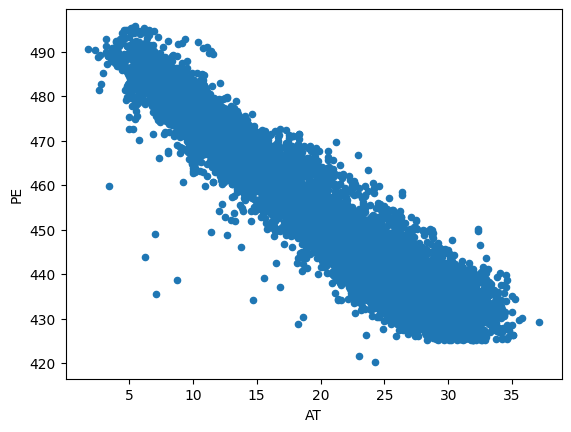

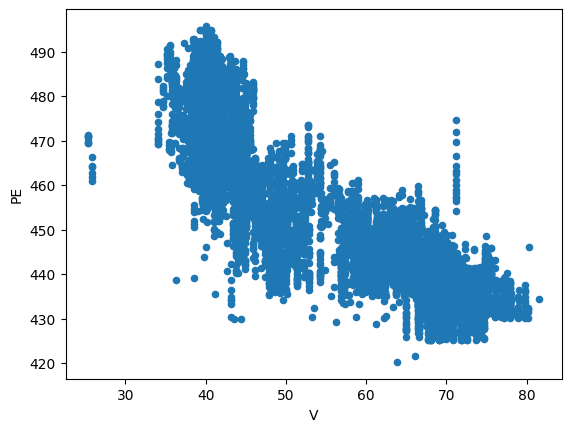

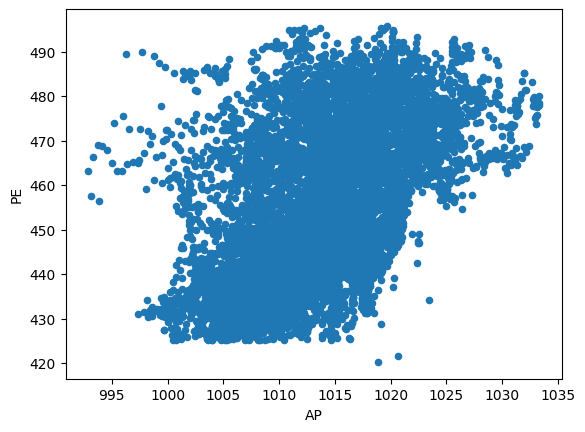

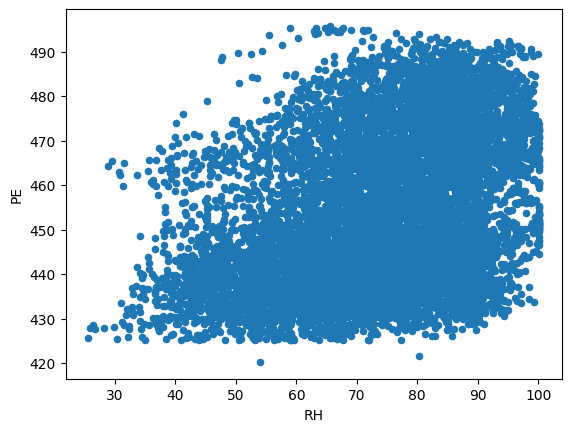

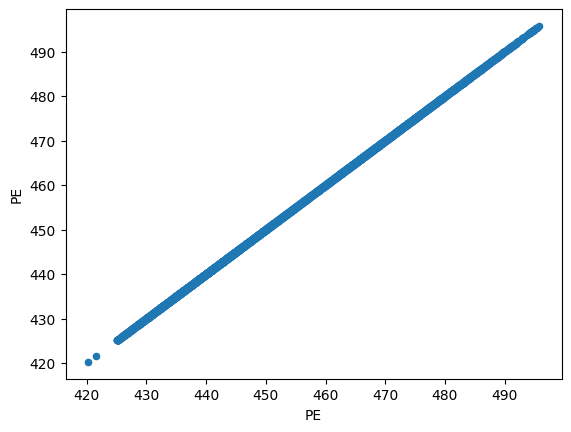

In [7]:
import matplotlib.pyplot as plt

for column in data:
    data.plot(str(column), 'PE', kind='scatter') 
plt.show()

## Test-train split

In [9]:
import numpy as np

np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(data, 0.1)
print(len(train_set))
print(len(test_set))

8612
956


## Correlations

In [14]:
corr_matrix = data.corr()

corr_matrix["PE"].sort_values(ascending=False)

print(corr_matrix)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


## Prepare data for training

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

prepared_train = train_set.loc[:, train_set.columns != 'PE']
labels_train = train_set['PE']

prepared_test = test_set.loc[:, test_set.columns != 'PE']
labels_test = test_set['PE']

## Linear regression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(prepared_train, labels_train)

predictions = lin_reg.predict(prepared_test)
lin_mse = mean_squared_error(labels_test, predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.362457527895247

## Test values

In [21]:
some_data = prepared_test.iloc[:5]
some_labels = labels_test.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))


Predictions: [455.66817473 438.78726694 434.1868752  438.83231512 479.83694927]
Labels: [455.27, 436.31, 440.68, 434.4, 482.06]


In [22]:
intercept = lin_reg.intercept_ 
coef = lin_reg.coef_

print(intercept)
print(coef)

455.7526584224567
[-1.98106316 -0.23283054  0.06105079 -0.15930525]


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_train, labels_train)

tree_predictions = tree_reg.predict(prepared_test)
tree_mse = mean_squared_error(labels_test, tree_predictions) 
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.526198447365873

In [25]:
print("Predictions:", tree_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [455.57 436.96 438.49 433.74 478.5 ]
Labels: [455.27, 436.31, 440.68, 434.4, 482.06]


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor 

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_train, labels_train)

forest_predictions = forest_reg.predict(prepared_test)
forest_mse = mean_squared_error(labels_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.9350179460490016

In [29]:
print("Predictions:", forest_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [455.0853 435.8296 436.0002 435.3538 478.5547]
Labels: [455.27, 436.31, 440.68, 434.4, 482.06]
